Functionality 1: Natural (with nature/environment) Physical Conditioning Optimization

# Documentation Pending

HANDS-ON EXECUTION OF IMPLEMENTATION STEPS

STEP 1: PRE-REQUISITES AND LIBRARY INSTALLATIONS

In [17]:
! pip install requests pandas numpy geopandas scikit-learn matplotlib

STEP 2: DATA ACQUISITION

In [18]:
import requests
import pandas as pd
from io import StringIO

# parsing the dataset name and API key
def API_upload(link_dataset):
 
    # define API endpoints
    core_url= 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    # dataset_id= apiKey
    key= link_dataset
    format= 'csv'
    web_url= f'{core_url}{key}/exports/{format}'
    params={
        # similar to SQL's  queries
        'select': '*',      # selects all fields from dataset
        'timezone': 'UTC',  # setting desired time zone in return data
        'lang': 'en',       # specifies language preference of data being retrieved
        'limit': '-1',      # defines maximum number of records to return
    }
    # get request for retrieving response
    response= requests.get(web_url, params= params)
    if response.status_code == 200:
        url_content= response.content.decode('utf-8')                   # convert raw response in bytes into UTF-8 encoded string
        df_dataset= pd.read_csv(StringIO(url_content), delimiter= ';')  # parse the csv content into a pandas DataFrame
        print('\n', key, '\n', df_dataset)
        pd.set_option('display.max_columns', None)                      # exhibit all coloumns of the data set
        print('\nlength of above dataset=', len(df_dataset))              # length of dataset computed
        return df_dataset
    else:
        return (print(f'Error fetching data from {web_url}: {response.status_code}'))
    
# download url 1.1.0 (OpenSpaceFitness-Usecase.Functionality 1.sensor location URL)
link_pedCount= 'pedestrian-counting-system-sensor-locations'
# download url 1.1.1 (OpenSpaceFitness-Usecase.Functionality 1.pedestrian count every minute URL)
link_countPm= 'pedestrian-counting-system-past-hour-counts-per-minute'

# loading the data via functions-

# Pedestrian counting System
df_pedFreq= API_upload(link_pedCount)
# Pedestrian counting Each Minute
df_pedFreq_Pm= API_upload(link_countPm)



 pedestrian-counting-system-sensor-locations 
      location_id                      sensor_description   sensor_name  \
0             24           Spencer St-Collins St (North)      Col620_T   
1             25  Melbourne Convention Exhibition Centre        MCEC_T   
2             36                         Queen St (West)       Que85_T   
3             41          Flinders La-Swanston St (West)         Swa31   
4             44            Tin Alley-Swanston St (West)         UM3_T   
..           ...                                     ...           ...   
136          161        Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164               I-Hub 526 La Trobe Street      Lat526_T   
138          164               I-Hub 526 La Trobe Street      Lat526_T   
139          164               I-Hub 526 La Trobe Street      Lat526_T   
140          166                      484 Spencer Street     Spen484_T   

    installation_date                                        no

In [19]:
# Display entire dataset for the following-

# Pedestrian counting System
dataset_pedPopulation= df_pedFreq.head(len(df_pedFreq))
print('\nSensor Location Dataset:\n', dataset_pedPopulation)
# Pedestrian counting Each Minute
dataset_pedPopulation_Pm= df_pedFreq_Pm.head(len(df_pedFreq_Pm))
print('\nPedestrian Count Per Minute Dataset:\n', dataset_pedPopulation_Pm)




Sensor Location Dataset:
      location_id                      sensor_description   sensor_name  \
0             24           Spencer St-Collins St (North)      Col620_T   
1             25  Melbourne Convention Exhibition Centre        MCEC_T   
2             36                         Queen St (West)       Que85_T   
3             41          Flinders La-Swanston St (West)         Swa31   
4             44            Tin Alley-Swanston St (West)         UM3_T   
..           ...                                     ...           ...   
136          161        Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164               I-Hub 526 La Trobe Street      Lat526_T   
138          164               I-Hub 526 La Trobe Street      Lat526_T   
139          164               I-Hub 526 La Trobe Street      Lat526_T   
140          166                      484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0          2013

STEP 3: EDA (Exploratory Data Analysis)

In [20]:
# fundamental information, outline of statistics, and examining the missing values

print("Sensor Location Dataset Details:")
print(dataset_pedPopulation.info())
print("\nSensor Location Dataset Statistics Encapsulation:")
print(dataset_pedPopulation.describe())
print("\nLost Values in Sensor Location Dataset:")
print(dataset_pedPopulation.isnull().sum())

print("\nPedestrian Frequency per Minute Dataset Details:")
print(dataset_pedPopulation_Pm.info())
print("\nPedestrian Frequency per Minute Dataset Statistics Encapsulation:")
print(dataset_pedPopulation_Pm.describe())
print("\nLost Values in Pedestrian Frequency per Minute:")
print(dataset_pedPopulation_Pm.isnull().sum())


Sensor Location Dataset Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_id         141 non-null    int64  
 1   sensor_description  139 non-null    object 
 2   sensor_name         141 non-null    object 
 3   installation_date   139 non-null    object 
 4   note                33 non-null     object 
 5   location_type       141 non-null    object 
 6   status              141 non-null    object 
 7   direction_1         109 non-null    object 
 8   direction_2         109 non-null    object 
 9   latitude            141 non-null    float64
 10  longitude           141 non-null    float64
 11  location            141 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ KB
None

Sensor Location Dataset Statistics Encapsulation:
       location_id    latitude   longitude
count   141.00

STEP 4: DATA CLEANING 

In [21]:
# cleaning the following data 

# sensor location API
dataset_pedPopulation['installation_date']= pd.to_datetime(dataset_pedPopulation['installation_date'], errors='coerce')
dataset_pedPopulation.dropna(subset= ['installation_date'], inplace= True)
print('Cleaned Sensor Location Dataset:','\n', dataset_pedPopulation)


Cleaned Sensor Location Dataset: 
      location_id                      sensor_description   sensor_name  \
0             24           Spencer St-Collins St (North)      Col620_T   
1             25  Melbourne Convention Exhibition Centre        MCEC_T   
2             36                         Queen St (West)       Que85_T   
3             41          Flinders La-Swanston St (West)         Swa31   
4             44            Tin Alley-Swanston St (West)         UM3_T   
..           ...                                     ...           ...   
136          161        Birrarung Marr - COM - Pole 1109  BirArt1109_T   
137          164               I-Hub 526 La Trobe Street      Lat526_T   
138          164               I-Hub 526 La Trobe Street      Lat526_T   
139          164               I-Hub 526 La Trobe Street      Lat526_T   
140          166                      484 Spencer Street     Spen484_T   

    installation_date                                        note  \
0      

STEP 5: ANALYZING PEDESTRIAN TRAFFIC USING CLUSTERING

In [22]:
# merge both the datasets (dataset_pedPopulation and dataset_pedPopulation_Pm ) based on the location_id field
# Both datasets are not of same size in terms of rows and columns 
merged_footTraffic= pd.merge(dataset_pedPopulation, dataset_pedPopulation_Pm, on='location_id', how='outer')
print("Merged Foot Traffic:\n", merged_footTraffic)

Merged Foot Traffic:
        location_id          sensor_description sensor_name installation_date  \
0                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
1                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
2                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
3                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
4                1  Bourke Street Mall (North)    Bou292_T        2009-03-24   
...            ...                         ...         ...               ...   
60301          166          484 Spencer Street   Spen484_T        2024-09-25   
60302          166          484 Spencer Street   Spen484_T        2024-09-25   
60303          166          484 Spencer Street   Spen484_T        2024-09-25   
60304          166          484 Spencer Street   Spen484_T        2024-09-25   
60305          166          484 Spencer Street   Spen484_T        2024-09-25   

                 

      latitude   longitude  total_of_directions
0   -37.825910  144.961860               2082.0
1   -37.825791  144.960843                  0.0
2   -37.825562  144.961154                  0.0
3   -37.825457  144.961312                  0.0
4   -37.824018  144.956044              15019.0
..         ...         ...                  ...
123 -37.798082  144.967210               4133.0
124 -37.796987  144.964413               1045.0
125 -37.794538  144.930362               1353.0
126 -37.794324  144.929734               2485.0
127 -37.789353  144.928606                  0.0

[128 rows x 3 columns]


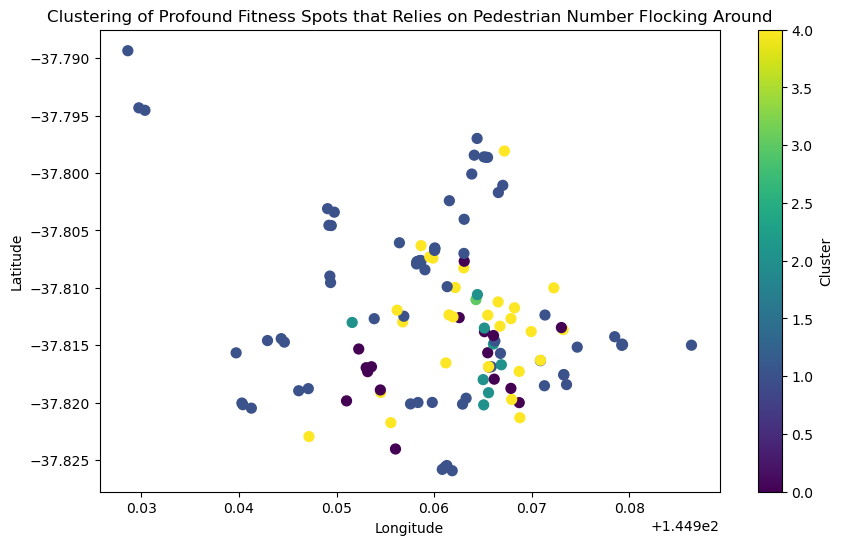

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# data preparastion for clustering
pedTraffic= merged_footTraffic.groupby(['latitude', 'longitude'])['total_of_directions'].sum().reset_index()
X= pedTraffic[['latitude', 'longitude', 'total_of_directions']]
print(X.head(len(X)))

# apply K-Means clustering to identify the popular fitness spots based on pedestrian counts
k_means= KMeans(n_clusters=5,random_state=42)
pedTraffic['cluster']= k_means.fit_predict(X)

# visual representation of clusters
plt.figure(figsize= (10,6))
# pedTraffic['longitude'] --> Specifies the x-coordinates (longitude values) of the points.
# pedTraffic['latitude'] --> Specifies the y-coordinates (latitude values) of the points.
# c= pedTraffic['cluster'] --> The color of each point corresponds to its cluster assignment ('cluster' column in pedTraffic).
# cmap= 'viridis' --> Specifies the color map (viridis) to use for coloring clusters.
# s=50 --> Specifies the size of each scatteered point.
plt.scatter(pedTraffic['longitude'], pedTraffic['latitude'], c= pedTraffic['cluster'], cmap= 'viridis', s=50)
plt.title('Clustering of Profound Fitness Spots that Relies on Pedestrian Number Flocking Around')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()
